In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'ETT-small/ETTm1.csv', index_col=0)

In [4]:
etth1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


In [5]:
etth1.shape

(69680, 7)

<Axes: xlabel='date'>

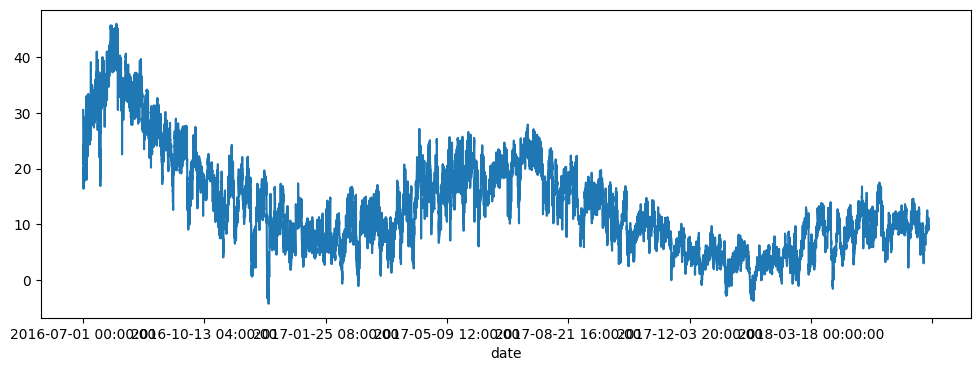

In [6]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

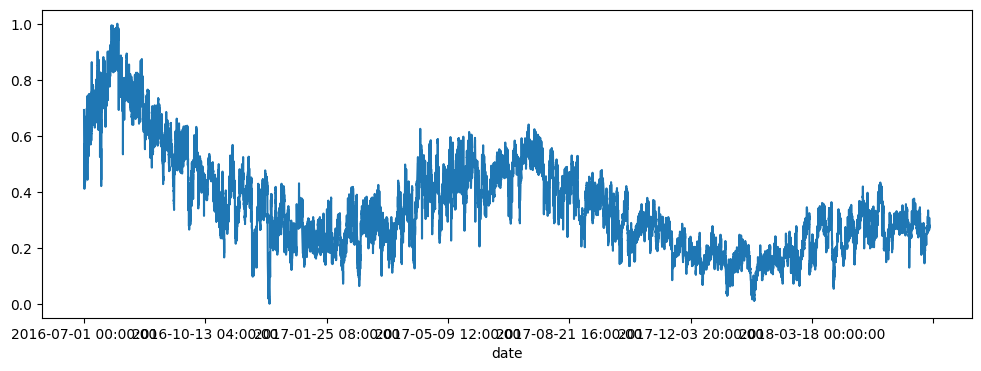

In [8]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [9]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1772996126
Epoch 2, Boundaries delta: 0.0700765069, Codewords delta: 0.0518916406
Epoch 3, Boundaries delta: 0.0476059011, Codewords delta: 0.0390047755
Epoch 4, Boundaries delta: 0.0354097702, Codewords delta: 0.0282398963
Epoch 5, Boundaries delta: 0.0253096542, Codewords delta: 0.0208777716
Epoch 6, Boundaries delta: 0.0185839355, Codewords delta: 0.0161609256
Epoch 7, Boundaries delta: 0.0144689684, Codewords delta: 0.0128770206
Epoch 8, Boundaries delta: 0.0115232495, Codewords delta: 0.0104004559
Epoch 9, Boundaries delta: 0.0095361950, Codewords delta: 0.0086802672
Epoch 10, Boundaries delta: 0.0081595709, Codewords delta: 0.0074905143
Epoch 11, Boundaries delta: 0.0072485093, Codewords delta: 0.0065907666
Epoch 12, Boundaries delta: 0.0064841519, Codewords delta: 0.0058399347
Epoch 13, Boundaries delta: 0.0058346363, Codewords delta: 0.0052769726
Epoch 14, Boundaries delta: 0.0052786552, Codewords delta: 0.0048379784
E

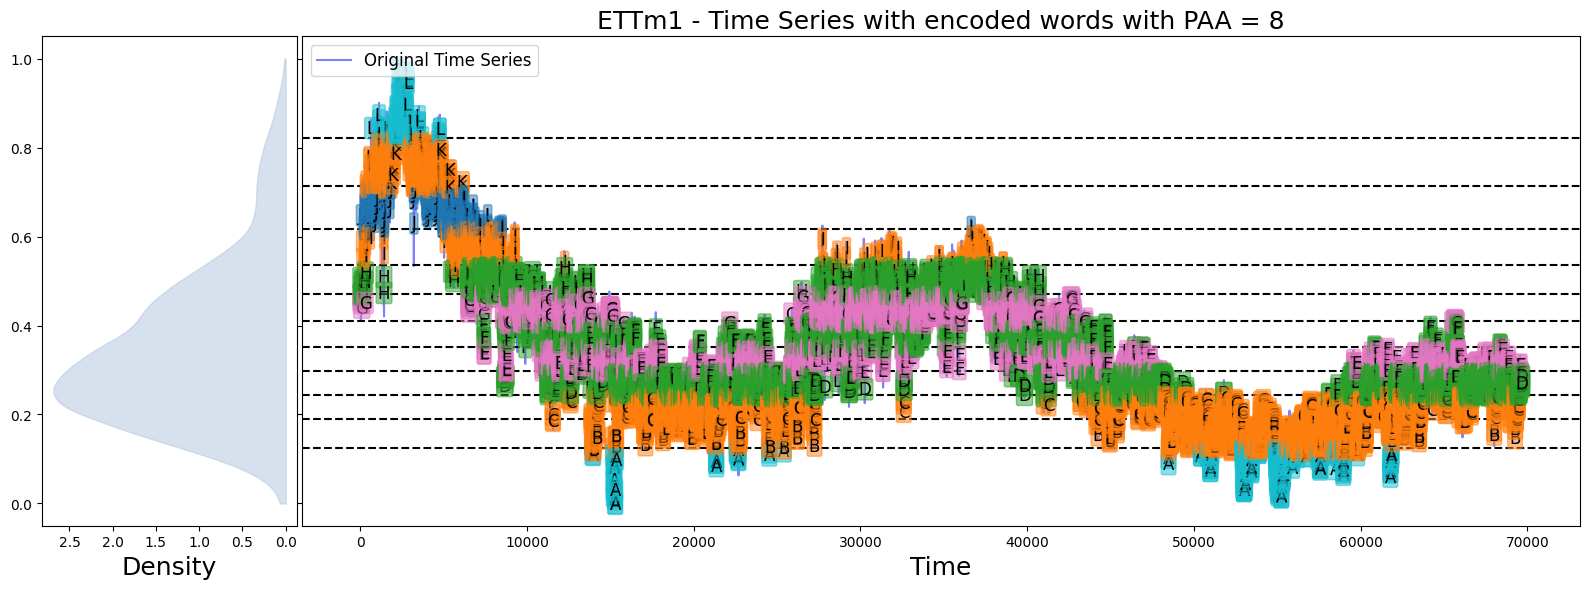

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm1_ksax.png", data_name='ETTm1')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm1_ksax.csv")

### Stationary

In [12]:
target = etth1['OT']
target = target.diff().dropna()

In [13]:
target.head()

date
2016-07-01 00:15:00   -0.071001
2016-07-01 00:30:00   -0.421999
2016-07-01 00:45:00   -3.025000
2016-07-01 01:00:00    0.774000
2016-07-01 01:15:00   -0.070002
Name: OT, dtype: float64

Epoch 1, Boundaries delta: 3.0468191270, Codewords delta: 2.8296936707
Epoch 2, Boundaries delta: 1.1986384596, Codewords delta: 0.5178614658
Epoch 3, Boundaries delta: 0.5486795784, Codewords delta: 0.3659823928
Epoch 4, Boundaries delta: 0.3776898049, Codewords delta: 0.2630675659
Epoch 5, Boundaries delta: 0.2646004931, Codewords delta: 0.1886666093
Epoch 6, Boundaries delta: 0.1857199615, Codewords delta: 0.1391763432
Epoch 7, Boundaries delta: 0.1316496308, Codewords delta: 0.1046076024
Epoch 8, Boundaries delta: 0.0958037865, Codewords delta: 0.0804564433
Epoch 9, Boundaries delta: 0.0721330310, Codewords delta: 0.0658075794
Epoch 10, Boundaries delta: 0.0581869204, Codewords delta: 0.0569403899
Epoch 11, Boundaries delta: 0.0500153883, Codewords delta: 0.0531953449
Epoch 12, Boundaries delta: 0.0460501764, Codewords delta: 0.0513660385
Epoch 13, Boundaries delta: 0.0435559542, Codewords delta: 0.0502497079
Epoch 14, Boundaries delta: 0.0419359133, Codewords delta: 0.0489604576
E

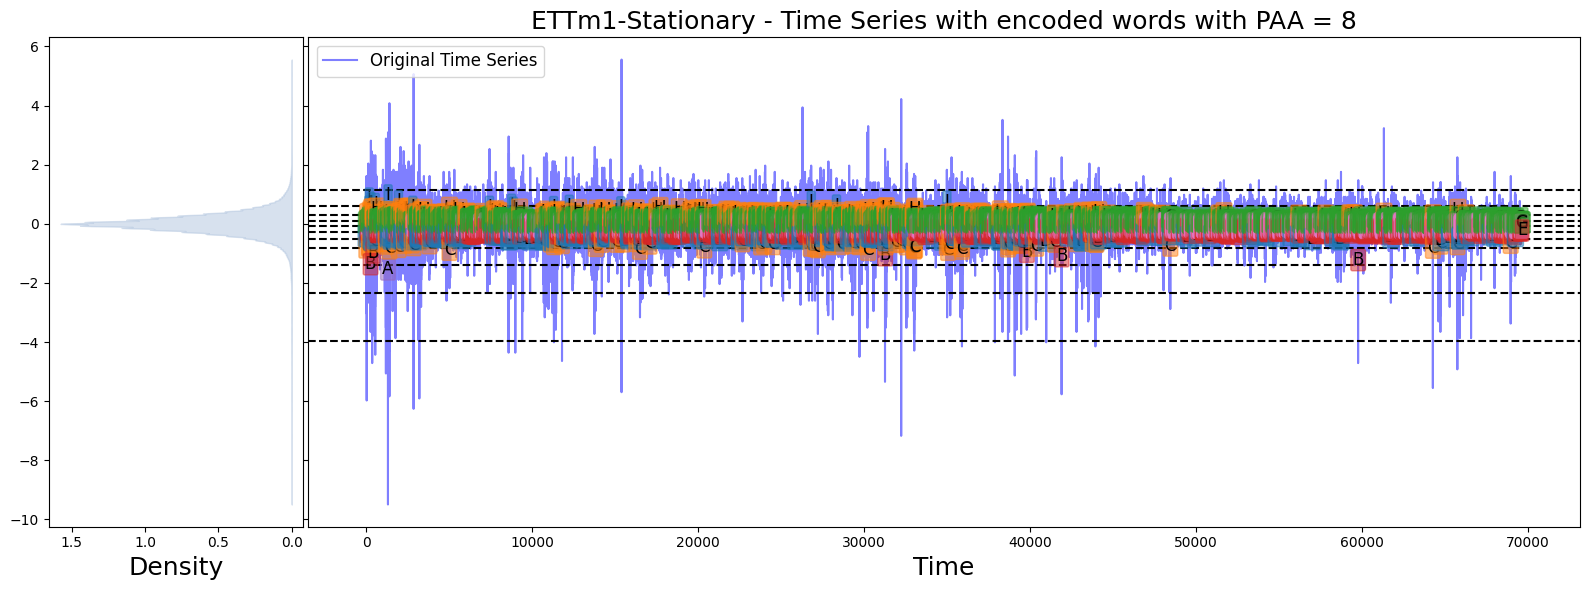

In [14]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm1_stationary_ksax.png", data_name='ETTm1-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm1_stationary_ksax.csv")